## Assignment 5: Full Pipeline and Model Deployment

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv

In [4]:
# train = np.genfromtxt('train.csv', delimiter=',', dtype=None)
# test = np.genfromtxt('test.csv', delimiter=',', dtype=None)
df = pd.read_csv("train.csv")

In [5]:
print(df.shape)

(318438, 18)


In [6]:
df.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [7]:
# basic shape, data type, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [8]:
# Prepare the data by separating X and y
# dropping unimportant features, such as passenger id, name, ticket number and cabin number
# note that interesting features might be engieered from the dropped features above

# axis = 1 below means dropping by columns, 0 means by rows
X = df.drop(['Stay', 'case_id'], axis=1)
y = df['Stay']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# any missing values?
X_train.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              94
patientid                               0
City_Code_Patient                    3654
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

num_features = ['Available Extra Rooms in Hospital', 'Admission_Deposit', 'Visitors with Patient']
cat_features = ['Hospital_code', 'City_Code_Hospital', 'Department', 'Ward_Type', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age', 'Bed Grade', 'Hospital_type_code', 'Ward_Facility_Code', 'Hospital_region_code', 'patientid']

In [11]:
#Original
num_features = ['Available Extra Rooms in Hospital', 'Admission_Deposit', 'Visitors with Patient']
cat_features = ['Hospital_code', 'City_Code_Hospital', 'Department', 'Ward_Type', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age', 'Bed Grade', 'Hospital_type_code', 'Ward_Facility_Code']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [13]:
# Specify the model to use, which is DecisionTreeClassifier
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [14]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies 
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x1 = 4 different combinations
param_grid_dt = [ 
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [10],
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

In [15]:
# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Available '
                                                                          'Extra '
                                                                          'Rooms '
                                                                          'in '
                                                                          'Hos

In [16]:
# check the best performing parameter combination
grid_search_dt.best_params_

{'clf_dt__criterion': 'gini',
 'clf_dt__max_depth': 10,
 'preprocessor__num_pipeline__num_imputer__strategy': 'median'}

In [17]:
# build-in CV results keys
sorted(grid_search_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_dt__criterion',
 'param_clf_dt__max_depth',
 'param_preprocessor__num_pipeline__num_imputer__strategy',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [18]:
# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

array([0.40814524, 0.40815309, 0.40793327, 0.40792149])

In [19]:
# best decistion tree model test score
print(grid_search_dt.best_score_)

0.40815309126594695


In [20]:
clf_best = grid_search_dt.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Available Extra Rooms in '
                                                   'Hospital',
                                                   'Admission_Deposit',
                                                   'Visitors with Patient']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
   

## Feature Importance

In [21]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['Available Extra Rooms in Hospital',
                                   'Admission_Deposit',
                                   'Visitors with Patient']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OneHotEncoder())]),
                                  ['Hospital_code', 'City_Code_Hospital',
                                   'Department', 'Ward_Type',
                                   'City_Code_Patient', 'Type of Admission',
       

In [22]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Available Extra Rooms in Hospital',
                                  'Admission_Deposit',
                                  'Visitors with Patient']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Hospital_code', 'City_Code_Hospital',
                                  'Department', 'Ward_Type',
                                  'City_Code_Patient', 'Type of Admission',
                                  'Se

In [23]:
i = clf_best['clf_dt'].feature_importances_
i

array([1.11020387e-02, 6.50303562e-02, 4.46830404e-01, 2.97695088e-04,
       0.00000000e+00, 6.14074094e-05, 9.44451918e-05, 0.00000000e+00,
       3.04280661e-04, 0.00000000e+00, 1.35284254e-04, 5.86680334e-05,
       5.50456826e-04, 4.34496297e-04, 2.59477091e-04, 6.08913980e-04,
       1.35513324e-03, 0.00000000e+00, 2.16784521e-04, 1.78066048e-03,
       9.44940374e-04, 2.13032275e-02, 7.01590999e-05, 0.00000000e+00,
       0.00000000e+00, 1.69774191e-04, 3.32691370e-03, 1.33428755e-04,
       5.43829356e-03, 5.22757079e-04, 1.35674609e-04, 7.80417935e-05,
       9.17620452e-04, 0.00000000e+00, 1.90892193e-04, 5.27654905e-04,
       7.58049488e-03, 2.46613116e-04, 9.31755294e-05, 2.71841239e-04,
       4.40552079e-04, 1.02592359e-02, 5.75474897e-04, 1.01129269e-04,
       9.45625136e-05, 0.00000000e+00, 2.15517520e-04, 1.02193172e-03,
       2.10912216e-03, 1.09315840e-03, 1.02553491e-04, 3.35730050e-02,
       1.33119906e-01, 9.11969229e-04, 4.04569377e-02, 0.00000000e+00,
      

In [24]:
clf_best['preprocessor'].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler())]),
  ['Available Extra Rooms in Hospital',
   'Admission_Deposit',
   'Visitors with Patient']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder())]),
  ['Hospital_code',
   'City_Code_Hospital',
   'Department',
   'Ward_Type',
   'City_Code_Patient',
   'Type of Admission',
   'Severity of Illness',
   'Age',
   'Bed Grade',
   'Hospital_type_code',
   'Ward_Facility_Code']),
 ('remainder', 'drop', [3, 9])]

In [25]:
# get columnTransformer
clf_best[0]

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Available Extra Rooms in Hospital',
                                  'Admission_Deposit',
                                  'Visitors with Patient']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Hospital_code', 'City_Code_Hospital',
                                  'Department', 'Ward_Type',
                                  'City_Code_Patient', 'Type of Admission',
                                  'Se

In [26]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                  ('scaler', StandardScaler())]),
  ['Available Extra Rooms in Hospital',
   'Admission_Deposit',
   'Visitors with Patient']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder())]),
  ['Hospital_code',
   'City_Code_Hospital',
   'Department',
   'Ward_Type',
   'City_Code_Patient',
   'Type of Admission',
   'Severity of Illness',
   'Age',
   'Bed Grade',
   'Hospital_type_code',
   'Ward_Facility_Code']),
 ('remainder', 'drop', [3, 9])]

In [27]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['Available Extra Rooms in Hospital',
 'Admission_Deposit',
 'Visitors with Patient']

In [28]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['Hospital_code',
 'City_Code_Hospital',
 'Department',
 'Ward_Type',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Bed Grade',
 'Hospital_type_code',
 'Ward_Facility_Code']

In [29]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['Hospital_code_1',
 'Hospital_code_2',
 'Hospital_code_3',
 'Hospital_code_4',
 'Hospital_code_5',
 'Hospital_code_6',
 'Hospital_code_7',
 'Hospital_code_8',
 'Hospital_code_9',
 'Hospital_code_10',
 'Hospital_code_11',
 'Hospital_code_12',
 'Hospital_code_13',
 'Hospital_code_14',
 'Hospital_code_15',
 'Hospital_code_16',
 'Hospital_code_17',
 'Hospital_code_18',
 'Hospital_code_19',
 'Hospital_code_20',
 'Hospital_code_21',
 'Hospital_code_22',
 'Hospital_code_23',
 'Hospital_code_24',
 'Hospital_code_25',
 'Hospital_code_26',
 'Hospital_code_27',
 'Hospital_code_28',
 'Hospital_code_29',
 'Hospital_code_30',
 'Hospital_code_31',
 'Hospital_code_32',
 'City_Code_Hospital_1',
 'City_Code_Hospital_2',
 'City_Code_Hospital_3',
 'City_Code_Hospital_4',
 'City_Code_Hospital_5',
 'City_Code_Hospital_6',
 'City_Code_Hospital_7',
 'City_Code_Hospital_9',
 'City_Code_Hospital_10',
 'City_Code_Hospital_11',
 'City_Code_Hospital_13',
 'Department_TB & Chest disease',
 'Department_anesthesia',

In [30]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['Available Extra Rooms in Hospital',
 'Admission_Deposit',
 'Visitors with Patient',
 'Hospital_code_1',
 'Hospital_code_2',
 'Hospital_code_3',
 'Hospital_code_4',
 'Hospital_code_5',
 'Hospital_code_6',
 'Hospital_code_7',
 'Hospital_code_8',
 'Hospital_code_9',
 'Hospital_code_10',
 'Hospital_code_11',
 'Hospital_code_12',
 'Hospital_code_13',
 'Hospital_code_14',
 'Hospital_code_15',
 'Hospital_code_16',
 'Hospital_code_17',
 'Hospital_code_18',
 'Hospital_code_19',
 'Hospital_code_20',
 'Hospital_code_21',
 'Hospital_code_22',
 'Hospital_code_23',
 'Hospital_code_24',
 'Hospital_code_25',
 'Hospital_code_26',
 'Hospital_code_27',
 'Hospital_code_28',
 'Hospital_code_29',
 'Hospital_code_30',
 'Hospital_code_31',
 'Hospital_code_32',
 'City_Code_Hospital_1',
 'City_Code_Hospital_2',
 'City_Code_Hospital_3',
 'City_Code_Hospital_4',
 'City_Code_Hospital_5',
 'City_Code_Hospital_6',
 'City_Code_Hospital_7',
 'City_Code_Hospital_9',
 'City_Code_Hospital_10',
 'City_Code_Hospital_11',

In [31]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
pd.set_option('display.max_rows', None)
r

,importance
Available Extra Rooms in Hospital,0.011102
Admission_Deposit,0.065030
Visitors with Patient,0.446830
Hospital_code_1,0.000298
Hospital_code_2,0.000000
Hospital_code_3,0.000061
Hospital_code_4,0.000094
Hospital_code_5,0.000000
Hospital_code_6,0.000304
Hospital_code_7,0.000000


In [32]:
r.sort_values('importance', ascending=False)

,importance
Visitors with Patient,0.446830
Ward_Type_Q,0.133120
Admission_Deposit,0.065030
Bed Grade_2.0,0.051178
Type of Admission_Emergency,0.043647
Ward_Type_S,0.040457
Ward_Type_P,0.033573
Bed Grade_1.0,0.021928
Hospital_code_19,0.021303
City_Code_Patient_8.0,0.017084


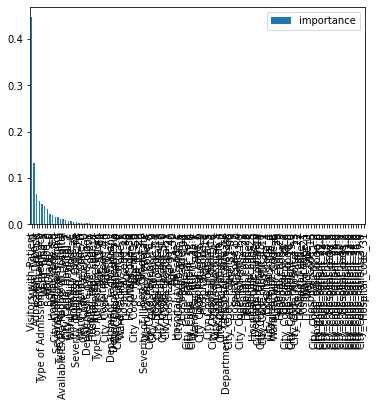

In [33]:
r.sort_values('importance', ascending=False).plot.bar()

## Persisting the Model

In [35]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "2clf-best.pickle")

['2clf-best.pickle']

In [37]:
saved_tree_clf = joblib.load("2clf-best.pickle")
saved_tree_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Available Extra Rooms in '
                                                   'Hospital',
                                                   'Admission_Deposit',
                                                   'Visitors with Patient']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
   

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [58]:
patient2 = pd.DataFrame(
    {
        'Hospital_code': [8],
        'Hospital_type_code': ['c'],
        'City_Code_Hospital': [4],
        'Hospital_region_code': ['Z'],
        'Available Extra Rooms in Hospital': [2],
        'Department': ['radiotherapy'],
        'Ward_Type': ['R'],
        'Ward_Facility_Code': ['D'],
        'Bed Grade': [2.0],
        'patientid': [8088],
        'City_Code_Patient': [8.0],
        'Type of Admission': ['Emergency'],
        'Severity of Illness': ['Moderate'],
        'Visitors with Patient': [4],
        'Age': ['31-40'],
        'Admission_Deposit': [4091.0]
    }
)
patient2

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8,c,4,Z,2,radiotherapy,R,D,2.0,8088,8.0,Emergency,Moderate,4,31-40,4091.0


patient1 = pd.DataFrame(
    {
        'Available Extra Rooms in Hospital': [2],
        'Admission_Deposit': [4091.0],
        'Visitors with Patient': [4],
        'Hospital_code': ['d'],
        'City_Code_Hospital': ['4'],
        'Department': ['radiotherapy'],
        'Ward_Type': ['R'],
        'City_Code_Patient': ['8.0'],
        'Type of Admission': ['Emergency'],
        'Severity of Illness': ['Moderate'],
        'Age': ['31-40'],
        'Bed Grade': ['2.0'],
        'Hospital_type_code': ['c'],
        'Ward_Facility_Code': ['D'],
        'patientid': [8088],
        'Hospital_region_code': ['Z']
    }
)
patient1        

In [59]:
pred2 = saved_tree_clf.predict(patient2)

In [60]:
pred2

array(['51-60'], dtype=object)

In [45]:
X.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')